# Метрики на предсказаниях прошлого алгоритма

In [9]:
import os
import sys
sys.path.insert(0, os.path.join('..'))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

from radial.batchflow import FilesIndex
%matplotlib inline
plt.style.use('ggplot')

In [10]:
ix_test = FilesIndex(path='./test_npz/*')

z = []
for i, name in enumerate(ix_test.indices):
    test = dict(np.load('./test_npz/'+name))
    z.append([test['target'], test['predictions']])
test_target = np.array(z)[:,0]
test_pred = np.array(z)[:,1]

log_target = np.log10(np.array(z)[:,0])
log_pred = np.log10(np.array(z)[:,1])

def metrics(target, pred, bins=10):
    print('MAE: {:.6}'.format(mae(target, pred)))
    mape = np.abs(target-pred)/target
    print('MAPE: {:.6}'.format(np.mean(mape)))
    print('30th percentile:{:.6}'.format(np.percentile(mape, q=30)))
    print('90th percentile:{:.6}'.format(np.percentile(mape, q=90)))
    sort_mape = np.argsort(mape)
    plt.hist(mape, bins=bins)
    plt.title('MAPE hist')
    print('Percentage of error more than 30% {:.3}'.format(np.sum(mape>0.3)/len(mape)))

MAE: 49.6132
MAPE: 0.619261
30th percentile:0.241389
90th percentile:1.00388
Percentage of error more than 30% 0.611


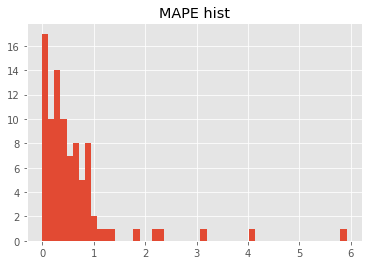

In [11]:
metrics(test_target, test_pred, 50)

Данные в логарифмической шкале

MAE: 49.6132
MAPE: 0.619261
30th percentile:0.241389
90th percentile:1.00388
Percentage of error more than 30% 0.611


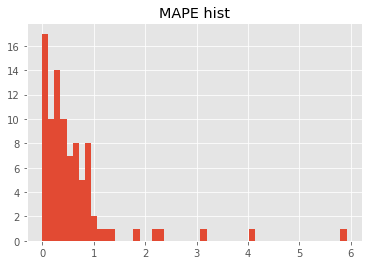

In [12]:
log_target = np.array(test_target)
log_pred= np.array(test_pred)
metrics(log_target, log_pred, 50)

# Создание разбиения на train/test согласно разбиению данных для обучения прошлого алгоритма

In [304]:
test_dataset = []
test = ix_test.indices
train = FilesIndex(path='./data/*').indices
for i, name in enumerate(test):
    t = dict(np.load('./test_npz/'+name))
    for n in train:
        s = dict(np.load('./data/'+n))
        if t['target'] == s['target'] and len(t['time']) == len(s['time']):
            test_dataset.append(n)
            break
    print(len(test_dataset),end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 

In [348]:
for name in test_dataset:
    os.rename('./data/'+name, './data/test/'+name)
for train in os.listdir('./data/'):
    if train[-4:] == '.npz':
        os.rename('./data/'+train, './data/train/'+train)